In [1]:
# import modules/downloads

import pandas as pd
import re
# from wordcloud import WordCloud

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim.corpora as corpora

from pprint import pprint

import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

import os

from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phraser


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# load test data files

train_set = pd.read_csv("train.txt", sep=";")
train_set.columns = ["text","sentiment"]
train_set.head()


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,sentiment
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [3]:
# Data cleaning/preprocessing

# Remove punctuation
train_set['text'] = \
train_set['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Make titles lowercase
train_set['text'] = \
train_set['text'].map(lambda x: x.lower())

# first rows of text
train_set['text'].head()


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-3-507f0d5b7e02>:5: DeprecationWarning: invalid escape sequence \.
  train_set['text'].map(lambda x: re.sub('[,\.!?]', '', x))


0    i can go from feeling so hopeless to so damned...
1     im grabbing a minute to post i feel greedy wrong
2    i am ever feeling nostalgic about the fireplac...
3                                 i am feeling grouchy
4    ive been feeling a little burdened lately wasn...
Name: text, dtype: object

In [4]:
# visual wordcloud exploratory analysis

# Join processed titles
joined_titles = ','.join(list(train_set['text'].values))

# WordCloud object
#word_cloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# show word cloud
#word_cloud.generate(joined_titles)
#word_cloud.to_image()


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\henry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
#transform text data to useful training LDA model input

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'feel', 'feeling', 'really','like'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

processed_docs = train_set['text'].map(preprocess)

processed_docs = remove_stopwords(processed_docs)
processed_docs



C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['hopeless', 'damn', 'hope', 'care', 'awak'],
 ['grab', 'minut', 'post', 'greedi', 'wrong'],
 ['nostalg', 'fireplac', 'know', 'properti'],
 ['grouchi'],
 ['littl', 'burden', 'late', 'wasnt', 'sure'],
 ['take',
  'milligram',
  'time',
  'recommend',
  'fall',
  'asleep',
  'faster',
  'funni'],
 ['confus', 'life', 'teenag', 'jade', 'year'],
 ['petrona', 'year', 'petrona', 'perform', 'huge', 'profit'],
 ['romant'],
 ['suffer', 'see', 'mean'],
 ['run', 'divin', 'experi', 'expect', 'type', 'spiritu', 'encount'],
 ['think', 'easiest', 'time', 'year', 'dissatisfi'],
 ['energi', 'thirsti'],
 ['immens',
  'sympathi',
  'general',
  'point',
  'possibl',
  'proto',
  'writer',
  'tri',
  'time',
  'write',
  'corner',
  'life',
  'sign',
  'agent',
  'publish',
  'contract',
  'littl',
  'precious'],
 ['reassur', 'anxieti'],
 ['didnt', 'embarrass'],
 ['pretti', 'pathet', 'time'],
 ['start',
  'sentiment',
  'doll',
  'child',
  'begin',
  'collect',
  'vintag',
  'barbi',
  'doll',
  'sixti']

In [7]:
# convert tokenized object into a corpus and dictionary

# Dictionary
id2word = corpora.Dictionary(processed_docs)
# Corpus
id2word.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# Term Document Frequency
bow_corpus = [id2word.doc2bow(doc) for doc in processed_docs]

print(bow_corpus[:1][0][:10])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
corpus_tfidf = tfidf[bow_corpus]

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5430810695011369),
 (1, 0.3632454936411252),
 (2, 0.495894386281144),
 (3, 0.3575309704339039),
 (4, 0.4465154265356968)]


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=6, id2word=id2word, passes=2, workers=2)

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.039*"go" + 0.014*"think" + 0.012*"day" + 0.010*"come" + 0.010*"look" + 0.010*"home" + 0.008*"littl" + 0.008*"today" + 0.008*"happen" + 0.008*"help"
Topic: 1 
Words: 0.046*"want" + 0.025*"love" + 0.022*"thing" + 0.018*"need" + 0.014*"dont" + 0.014*"pretti" + 0.013*"good" + 0.011*"tell" + 0.010*"strang" + 0.009*"right"
Topic: 2 
Words: 0.025*"know" + 0.020*"peopl" + 0.019*"think" + 0.016*"love" + 0.015*"life" + 0.013*"dont" + 0.013*"http" + 0.013*"right" + 0.011*"href" + 0.009*"time"
Topic: 3 
Words: 0.022*"think" + 0.020*"peopl" + 0.010*"need" + 0.010*"person" + 0.009*"wonder" + 0.009*"time" + 0.009*"work" + 0.009*"write" + 0.008*"know" + 0.008*"care"
Topic: 4 
Words: 0.028*"time" + 0.018*"know" + 0.016*"friend" + 0.016*"littl" + 0.010*"thing" + 0.009*"love" + 0.008*"year" + 0.008*"leav" + 0.008*"long" + 0.008*"today"
Topic: 5 
Words: 0.021*"make" + 0.019*"life" + 0.017*"time" + 0.017*"littl" + 0.015*"know" + 0.012*"amaz" + 0.011*"start" + 0.008*"happi" + 0.008*"tri" 

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Visualize the topics
cwd = os.getcwd()
directory = os.path.join(cwd, 'results/lda_vis_'+str(6))
if not os.path.exists(directory):
    os.makedirs(directory)

pyLDAvis.enable_notebook()
LDAvis_filepath = os.path.join('./results/ldavis_prepared_'+str(6))

if 1 == 1:
    LDA_vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, id2word)
    with open(LDAvis_filepath, 'wb') as f:
        pickle.dump(LDA_vis, f)

# load pyLDAvis data from disk
with open(LDAvis_filepath, 'rb') as f:
    LDA_vis = pickle.load(f)
pyLDAvis.save_html(LDA_vis, './results/ldavis_prepared_'+ str(6) +'.html')

LDA_vis

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.014806 -0.059402       1        1  17.786903
2      0.081906  0.055347       2        1  17.029411
3      0.038986  0.075490       3        1  16.668389
1      0.059893 -0.076424       4        1  16.410959
4     -0.057235 -0.062822       5        1  16.111782
5     -0.108744  0.067813       6        1  15.992556, topic_info=      Term        Freq       Total Category  logprob  loglift
151   want  831.000000  831.000000  Default  30.0000  30.0000
251     go  702.000000  702.000000  Default  29.0000  29.0000
101  peopl  653.000000  653.000000  Default  28.0000  28.0000
525   make  392.000000  392.000000  Default  27.0000  27.0000
26    life  546.000000  546.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
42   think   96.108420  906.853483   Topic6  -4.8429  -0.4115
191   look   74.797324  426.074209   Topic6  -5.0936   0.0932
189   good   70.810245  401.508827   Topic6  -5.1484   0.0978
147   away   55.800083  231.454236   Topic6  -5.3866   0.4104
101  peopl   58.900323  653.465932   Topic6  -5.3326  -0.5734

[411 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1135      1  0.099150  abandon
1135      2  0.049575  abandon
1135      5  0.099150  abandon
1135      6  0.793197  abandon
134       1  0.143559   accept
...     ...       ...      ...
28        2  0.076680     year
28        3  0.128822     year
28        4  0.082814     year
28        5  0.315921     year
28        6  0.282182     year

[1541 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2, 5, 6])

Preprocessing Test

In [14]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=6, id2word=id2word, passes=2, workers=4)

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Preprocessing Test

In [15]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"friend" + 0.010*"go" + 0.010*"life" + 0.009*"know" + 0.009*"dont" + 0.008*"start" + 0.008*"time" + 0.007*"support" + 0.007*"peopl" + 0.006*"think"
Topic: 1 Word: 0.009*"time" + 0.007*"want" + 0.007*"today" + 0.007*"think" + 0.007*"know" + 0.006*"glad" + 0.006*"go" + 0.006*"pretti" + 0.006*"year" + 0.006*"peopl"
Topic: 2 Word: 0.010*"weird" + 0.009*"go" + 0.009*"know" + 0.008*"sure" + 0.008*"hat" + 0.007*"come" + 0.007*"today" + 0.007*"time" + 0.006*"miss" + 0.006*"amaz"
Topic: 3 Word: 0.010*"want" + 0.009*"happi" + 0.008*"dont" + 0.008*"know" + 0.008*"irrit" + 0.007*"accept" + 0.007*"lose" + 0.007*"good" + 0.006*"time" + 0.006*"thing"
Topic: 4 Word: 0.014*"love" + 0.010*"know" + 0.010*"need" + 0.008*"overwhelm" + 0.007*"think" + 0.007*"work" + 0.007*"littl" + 0.007*"time" + 0.006*"person" + 0.006*"make"
Topic: 5 Word: 0.012*"littl" + 0.010*"look" + 0.009*"think" + 0.009*"want" + 0.008*"thing" + 0.008*"tell" + 0.007*"love" + 0.007*"time" + 0.007*"long" + 0.006*"mea

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Visualize the topics
cwd = os.getcwd()
directory = os.path.join(cwd, 'results/lda_vis_'+str(6))
if not os.path.exists(directory):
    os.makedirs(directory)

pyLDAvis.enable_notebook()
LDAvis_filepath = os.path.join('./results/ldavis_prepared_'+str(6))

if 1 == 1:
    LDA_vis = pyLDAvis.gensim_models.prepare(lda_model_tfidf, corpus_tfidf, id2word)
    with open(LDAvis_filepath, 'wb') as f:
        pickle.dump(LDA_vis, f)

# load pyLDAvis data from disk
with open(LDAvis_filepath, 'rb') as f:
    LDA_vis = pickle.load(f)
pyLDAvis.save_html(LDA_vis, './results/ldavis_prepared_'+ str(6) +'.html')

LDA_vis

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.009501  0.067608       1        1  17.510969
4     -0.060270  0.011771       2        1  17.168598
3      0.055399 -0.005814       3        1  16.749709
0     -0.029626 -0.000929       4        1  16.591624
1      0.065762  0.000749       5        1  16.015513
2     -0.021763 -0.073385       6        1  15.963587, topic_info=         Term       Freq       Total Category  logprob  loglift
498     weird  69.000000   69.000000  Default  30.0000  30.0000
67      irrit  71.000000   71.000000  Default  29.0000  29.0000
441       hat  58.000000   58.000000  Default  28.0000  28.0000
84       glad  48.000000   48.000000  Default  27.0000  27.0000
4    hopeless  39.000000   39.000000  Default  26.0000  26.0000
..        ...        ...         ...      ...      ...      ...
127      leav  23.724959  121.874387   Topic6  -5.3711   0.1984
99       love  25.331335  216.925188   Topic6  -5.3056  -0.3127
15      littl  25.079271  206.761318   Topic6  -5.3156  -0.2747
1        care  21.530182   78.548896   Topic6  -5.4682   0.5406
282     happi  21.577650  101.495862   Topic6  -5.4660   0.2865

[394 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1135      2  0.102790  abandon
1135      4  0.205579  abandon
1135      6  0.616738  abandon
538       1  0.076083     abus
538       2  0.114124     abus
...     ...       ...      ...
28        2  0.114667     year
28        3  0.114667     year
28        4  0.200667     year
28        5  0.315334     year
28        6  0.114667     year

[1624 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 4, 1, 2, 3])

In [18]:
print("Predicting topics for: " + str(train_set["sentiment"][15]))
for index, score in sorted(lda_model[bow_corpus[15]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

Predicting topics for: sadness

Score: 0.7211295366287231	 
Topic: 0.022*"think" + 0.020*"peopl" + 0.010*"need" + 0.010*"person" + 0.009*"wonder" + 0.009*"time" + 0.009*"work" + 0.009*"write" + 0.008*"know" + 0.008*"care"

Score: 0.05601312592625618	 
Topic: 0.039*"go" + 0.014*"think" + 0.012*"day" + 0.010*"come" + 0.010*"look" + 0.010*"home" + 0.008*"littl" + 0.008*"today" + 0.008*"happen" + 0.008*"help"

Score: 0.055786073207855225	 
Topic: 0.046*"want" + 0.025*"love" + 0.022*"thing" + 0.018*"need" + 0.014*"dont" + 0.014*"pretti" + 0.013*"good" + 0.011*"tell" + 0.010*"strang" + 0.009*"right"

Score: 0.05575256422162056	 
Topic: 0.021*"make" + 0.019*"life" + 0.017*"time" + 0.017*"littl" + 0.015*"know" + 0.012*"amaz" + 0.011*"start" + 0.008*"happi" + 0.008*"tri" + 0.008*"think"

Score: 0.05568555369973183	 
Topic: 0.028*"time" + 0.018*"know" + 0.016*"friend" + 0.016*"littl" + 0.010*"thing" + 0.009*"love" + 0.008*"year" + 0.008*"leav" + 0.008*"long" + 0.008*"today"

Score: 0.05563318729

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
print("Predicting topics for: " + str(train_set["sentiment"][15]))
for index, score in sorted(lda_model_tfidf[bow_corpus[15]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))

Predicting topics for: sadness

Score: 0.7209810614585876	 
Topic: 0.010*"friend" + 0.010*"go" + 0.010*"life" + 0.009*"know" + 0.009*"dont" + 0.008*"start" + 0.008*"time" + 0.007*"support" + 0.007*"peopl" + 0.006*"think"

Score: 0.05585774406790733	 
Topic: 0.010*"weird" + 0.009*"go" + 0.009*"know" + 0.008*"sure" + 0.008*"hat" + 0.007*"come" + 0.007*"today" + 0.007*"time" + 0.006*"miss" + 0.006*"amaz"

Score: 0.05583910644054413	 
Topic: 0.010*"want" + 0.009*"happi" + 0.008*"dont" + 0.008*"know" + 0.008*"irrit" + 0.007*"accept" + 0.007*"lose" + 0.007*"good" + 0.006*"time" + 0.006*"thing"

Score: 0.055833850055933	 
Topic: 0.009*"time" + 0.007*"want" + 0.007*"today" + 0.007*"think" + 0.007*"know" + 0.006*"glad" + 0.006*"go" + 0.006*"pretti" + 0.006*"year" + 0.006*"peopl"

Score: 0.055792830884456635	 
Topic: 0.012*"littl" + 0.010*"look" + 0.009*"think" + 0.009*"want" + 0.008*"thing" + 0.008*"tell" + 0.007*"love" + 0.007*"time" + 0.007*"long" + 0.006*"mean"

Score: 0.05569539964199066	 


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
unseen_document = pd.read_csv("tidy_text_data.csv")
unseen_document = unseen_document["text_new"][3]
bow_vector = id2word.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Score: 0.5671687722206116	 Topic: 0.028*"time" + 0.018*"know" + 0.016*"friend" + 0.016*"littl" + 0.010*"thing"
Score: 0.24746118485927582	 Topic: 0.025*"know" + 0.020*"peopl" + 0.019*"think" + 0.016*"love" + 0.015*"life"
Score: 0.13937050104141235	 Topic: 0.021*"make" + 0.019*"life" + 0.017*"time" + 0.017*"littl" + 0.015*"know"
Score: 0.015380313619971275	 Topic: 0.046*"want" + 0.025*"love" + 0.022*"thing" + 0.018*"need" + 0.014*"dont"
Score: 0.015326025895774364	 Topic: 0.039*"go" + 0.014*"think" + 0.012*"day" + 0.010*"come" + 0.010*"look"
Score: 0.015293191187083721	 Topic: 0.022*"think" + 0.020*"peopl" + 0.010*"need" + 0.010*"person" + 0.009*"wonder"


In [49]:
unseen_document = pd.read_csv("tidy_text_data.csv")
unseen_document = unseen_document["text_new"][3]
bow_vector_tfidf = id2word.doc2bow(preprocess(unseen_document))



for index, score in sorted(lda_model_tfidf[bow_vector_tfidf], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Score: 0.6502744555473328	 Topic: 0.046*"want" + 0.025*"love" + 0.022*"thing" + 0.018*"need" + 0.014*"dont"
Score: 0.2883511781692505	 Topic: 0.022*"think" + 0.020*"peopl" + 0.010*"need" + 0.010*"person" + 0.009*"wonder"
Score: 0.015389679931104183	 Topic: 0.021*"make" + 0.019*"life" + 0.017*"time" + 0.017*"littl" + 0.015*"know"
Score: 0.015346027910709381	 Topic: 0.028*"time" + 0.018*"know" + 0.016*"friend" + 0.016*"littl" + 0.010*"thing"
Score: 0.015322077088057995	 Topic: 0.025*"know" + 0.020*"peopl" + 0.019*"think" + 0.016*"love" + 0.015*"life"
Score: 0.015316622331738472	 Topic: 0.039*"go" + 0.014*"think" + 0.012*"day" + 0.010*"come" + 0.010*"look"


In [44]:
val_set = pd.read_csv("./train.txt",sep=";")
val_set.columns = ["text","sentiment"]


# Remove punctuation
val_set['text'] = \
val_set['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Make titles lowercase
val_set['text'] = \
val_set['text'].map(lambda x: x.lower())

processed_docs_val = val_set['text'].map(preprocess)

processed_docs_val = remove_stopwords(processed_docs)

bow_vector_val = [id2word.doc2bow(doc) for doc in processed_docs_val]


C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \.
<>:7: DeprecationWarning: invalid escape sequence \.
<ipython-input-44-c1ae990b99b3>:7: DeprecationWarning: invalid escape sequence \.
  val_set['text'].map(lambda x: re.sub('[,\.!?]', '', x))


In [45]:
def eval_score(lda_model, corpus, num_text):
    scores = lda_model[corpus[num_text]]
    scores = [score for _, score in scores]
    index_big_score = np.argmax(scores)
    return index_big_score, scores[index_big_score]

eval_list = [eval_score(lda_model=lda_model, corpus=bow_vector_val,  num_text=num_text) for num_text in range(len(val_set["text"]))]
predicted_labels = [label for label, _ in eval_list]

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       topic  cluster  count
0      anger        0    312
1      anger        1    319
2      anger        2    386
3      anger        3    330
4      anger        4    415
5      anger        5    397
6       fear        0    308
7       fear        1    352
8       fear        2    254
9       fear        3    400
10      fear        4    349
11      fear        5    274
12       joy        0   1030
13       joy        1    883
14       joy        2    975
15       joy        3    933
16       joy        4    733
17       joy        5    808
18      love        0    175
19      love        1    282
20      love        2    241
21      love        3    178
22      love        4    246
23      love        5    182
24   sadness        0    951
25   sadness        1    622
26   sadness        2    698
27   sadness        3    756
28   sadness        4    830
29   sadness        5    808
30  surprise        0     73
31  surprise        1    111
32  surprise        2    106
33  surprise  

C:\Users\henry\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.004926028462507985

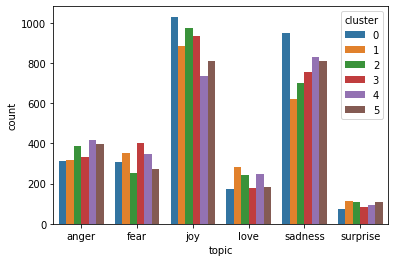

In [46]:
import seaborn as sns
from sklearn.metrics import v_measure_score
def breakdown_clusters_by_ground_truth(y_true, cluster_labels, display=True):
    """
    If display = True, 
        display counts of documents of each topic in each of the generated
        clusters and plot the same.

    Returns v-measure of cluster labels with respect to ground truth
    """

    assert len(y_true) == len(cluster_labels), "Length of Target and cluster labels don't match"
    df = pd.DataFrame({'topic' : y_true, 'cluster' : cluster_labels})
    counts = df.groupby(['topic', 'cluster']).size().reset_index().rename(columns={0:'count'})
    if display :
        print(counts)
        sns.barplot(x="topic", y="count", hue="cluster", data=counts)
    return v_measure_score(y_true, cluster_labels)

breakdown_clusters_by_ground_truth(val_set["sentiment"], predicted_labels, True)